# Acquiring Multi-Echo Data

## Available multi-echo fMRI sequences

We have attempted to compile some basic multi-echo fMRI protocols in an [OSF project](https://osf.io/ebkrp/).
The parameter choices in these protocols run and seem reasonable, but they have
not been optimized for a specific situation.
They are a good starting point for someone designing a study, but should not be
considered canonical.
If you would like to use one of them, please customize it for your own purposes
and make sure to run pilot scans to test your choices.

### Siemens

**For Siemens users**, there are two options for Works In Progress (WIPs) Sequences.

- The Center for Magnetic Resonance Research at the University of Minnesota
  provides a custom MR sequence that allows users to collect multiple echoes
  (termed **Contrasts**). The sequence and documentation can be [found here](https://www.cmrr.umn.edu/multiband/).
  For details on obtaining a license follow
  [this link](http://license.umn.edu/technologies/cmrr_center-for-magnetic-resonance-research-software-for-siemens-mri-scanners).
  By default the number of contrasts is 1, yielding a single-echo sequence.
  In order to collect multiple echoes, increase number of Contrasts on the
  **Sequence Tab, Part 1** on the MR console.
- The Martinos Center at Harvard also has a MR sequence available, with the details
  [available here](https://www.nmr.mgh.harvard.edu/software/c2p/sms).
  The number of echoes can be specified on the **Sequence, Special** tab in this sequence.

### GE

**For GE users**, there are currently two sharable pulse sequences:

- Multi-echo EPI (MEPI) – Software releases: DV24, MP24 and DV25 (with offline recon)
- Hyperband Multi-echo EPI (HyperMEPI) - Software releases: DV26, MP26, DV27, RX27
  (here hyperband can be deactivated to do simple Multi-echo EPI – online recon)

Please reach out to the GE Research Operation team or each pulse sequence’s
author to begin the process of obtaining this software.
More information can be found on the [GE Collaboration Portal](https://collaborate.mr.gehealthcare.com).

Once logged in, go to Groups > GE Works-in-Progress you can find the description
of the current ATSM (i.e. prototypes).

### Philips

**For Philips users**, sequences can be defined using product software.

Multi-echo EPI (ME-EPI) can be acquired using the product software and can be combined with
SENSE parallel imaging and MultiBand.
The combination with MultiBand requires a SW release >R5.1 and MultiBand functionality to be present.
No default ME-EPI are provided, but existing single-echo EPI sequences from the BOLD fMRI folder can be
modified into multi-echo sequences by increasing the number of echoes.
As a starting point to develop a 3 echo EPI protocol start by opening the default fMRI protocol and
modify the following: increase number of echoes to 3 on the Contrast tab, set SENSE = 3, MB-SENSE = 3,
set to 3mm isotropic voxels and adjust TEs to your preference.

## Other available multi-echo MRI sequences

In addition to ME-fMRI, other MR sequences benefit from acquiring multiple
echoes, including T1-weighted imaging (MEMPRAGE) and susceptibility weighted imaging.
While most of these kinds of sequences fall outside the purview of this documentation,
quantitative T2* mapping is relevant since a baseline T2* map is used in several
processing steps including :ref:`optimal combination`.
While the T2* map estimated directly from fMRI time series is noisy, no current
study quantifies the benefit to optimal combination or tedana denoising if a
higher quality T2* map is used.
Some benefit is likely, so, if a T2* map is independently calculated, it can be
used as an input to many functions in the tedana workflow.

.. warning::
    While tedana allows the input of a T2* map from any source, and a more
    accurate T2* map should lead to better results, this hasn't been
    systematically evaluated yet.

There are many ways to calculate T2* maps, with some using multi-echo acquisitions.
We are not presenting an expansive review of this literature here,
but [Cohen-Adad et al. (2012)](https://doi.org/10.1016/j.neuroimage.2012.01.053)
and [Ruuth et al. (2019)](https://doi.org/10.1016/j.ejro.2018.12.006) are good places to start
learning more about this topic.

## Acquisition parameter recommendations

There is no empirically tested best parameter set for multi-echo fMRI acquisition.
The guidelines for optimizing parameters are similar to single-echo fMRI.
For multi-echo fMRI, the same factors that may guide priorities for single echo
fMRI sequences are also relevant.
Choose sequence parameters that meet the priorities of a study with regards to spatial resolution,
spatial coverage, sample rate, signal-to-noise ratio, signal drop-out, distortion, and artifacts.

A minimum of 3 echoes is required for running the current implementation fo TE-dependent denoising in
``tedana``.
It may be useful to have at least one echo that is earlier and one echo that is later than the
TE one would use for single-echo T2* weighted fMRI.

```{note}
This is in contrast to the **dual echo** denoising method which uses a very early (~5ms)
first echo in order to clean data. For more information on this method, see
[Bright and Murphy (2013)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3518782/).
```

More than 3 echoes may be useful, because that would allow for more accurate
estimates of BOLD and non-BOLD weighted fluctuations, but more echoes have an
additional time cost, which would result in either less spatiotemporal coverage
or more acceleration.
Where the benefits of more echoes balance out the additional costs is an open research question.

We are not recommending specific parameter options at this time.
There are multiple ways to balance the slight time cost from the added echoes that have
resulted in research publications.
We suggest new multi-echo fMRI users examine the :ref:`spreadsheet of publications` that use
multi-echo fMRI to identify studies with similar acquisition priorities,
and use the parameters from those studies as a starting point.
More complete recommendations and guidelines are discussed in the
[appendix of Dipasquale et al. (2017)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0173289).

```{note}
In order to increase the number of contrasts ("echoes") you may need to first increase the TR, shorten the
first TE and/or enable in-plane acceleration.
For typically used parameters see the **ME-fMRI parameters** section below.
```

## ME-fMRI parameters

The following section highlights a selection of parameters collected from published papers that have
used multi-echo fMRI.
You can see the spreadsheet of publications at
[spreadsheet of publications](https://docs.google.com/spreadsheets/d/1WERojJyxFoqcg_tndUm5Kj0H1UfUc9Ban0jFGGfPaBk/edit#gid=0).

The following plots reflect the average values for studies conducted at 3 Tesla.

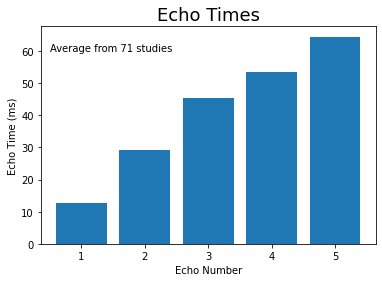

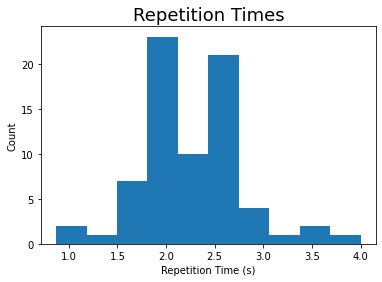

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


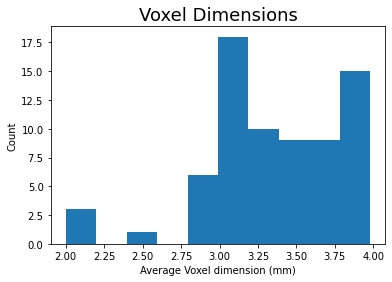

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# TODO: deal with the issue that the plot doesn't regenerate (ie isn't alive)
# Unless the code is updated.
metable = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1WERojJyxFoqcg_tndUm5Kj0H1UfUc9Ban0jFGGfPaBk/export?gid=0&format=csv',
    header=0,
)
TEs = [metable.TE1.mean(), metable.TE2.mean(), metable.TE3.mean(), metable.TE4.mean(), metable.TE5.mean()]
TE_labels = ['TE1', 'TE2', 'TE3', 'TE4', 'TE5']
plt.bar([1, 2, 3, 4, 5], TEs)
plt.title('Echo Times', fontsize=18)
pub_count = metable.TE1.count()
plt.text(0.5,60, 'Average from {} studies'.format(pub_count))
plt.xlabel('Echo Number')
plt.ylabel('Echo Time (ms)')
plt.show()

plt.hist(metable.TR.to_numpy())
plt.title('Repetition Times', fontsize = 18)
plt.xlabel('Repetition Time (s)')
plt.ylabel('Count')
plt.show()

x_vox = metable.x.to_numpy()
y_vox = metable.y.to_numpy()
z_vox = metable.z.to_numpy()
plt.hist(np.nanmean([x_vox, y_vox, z_vox],0))
plt.title('Voxel Dimensions', fontsize = 18)
plt.xlabel('Average Voxel dimension (mm)')
plt.ylabel('Count')
plt.show()